SMC8 - Test Resuts

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import csv
from matplotlib.cm import get_cmap

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# upload files
csv_file_path = "/home/ibroto/Documents/SMC/proj_SoundField/testData/Aftertest _Questionnaire.csv"
data_afterquestionnaire = pd.read_csv(csv_file_path, usecols=[i for i in range(1,24)], header = 0, names = ['Subject Id', 'Group Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10','GQ1', 'GQ2', 'GQ3', 'GQ4', 'GQ5', 'GQ6', 'GQ7', 'FQ1', 'FQ2', 'FQ3', 'Comments'])
data_afterquestionnaire.rename(columns={"Subject Id\n":"Subject Id"}, inplace=True)

data_afterquestionnaire.head()
csv_file_path1 = "/home/ibroto/Documents/SMC/proj_SoundField/testData/Beforetest_Questionnaire.csv"
data_beforequestionnaire = pd.read_csv(csv_file_path1,usecols=[i for i in range(2,15)],header = 0, names=['Subject Id', 'Group Id', 'Age', 'Gender', 'Nationality', 'OMSI', 'Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7'])
data_beforequestionnaire.loc[data_beforequestionnaire['Task5'] == 0, 'Task5'] = 6
data_beforequestionnaire.head()

merged = data_beforequestionnaire.merge(data_afterquestionnaire, on=['Subject Id', 'Group Id'])

## SUS Score computation

avg SUS: 65.41666666666667    std dev SUS: 19.212724634439226


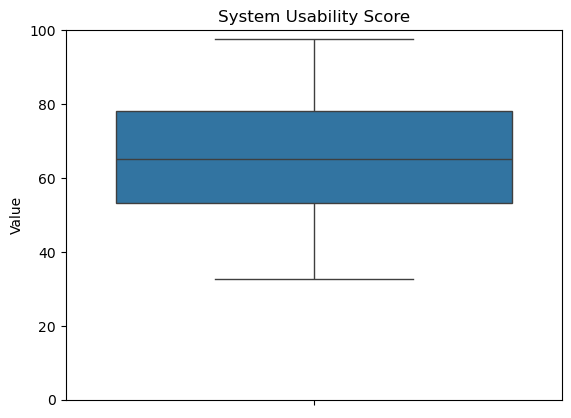

In [5]:
SUS_data = data_afterquestionnaire[['Subject Id', 'Group Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].copy()
odd_questions = ['Q1', 'Q3', 'Q5', 'Q7', 'Q9']
even_questions = ['Q2', 'Q4', 'Q6', 'Q8', 'Q10']


for i in odd_questions:
    SUS_data[i] = SUS_data[i]-1


for i in even_questions:
    SUS_data[i] = 5 - SUS_data[i]

SUS_data['SUS'] = SUS_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].sum(axis=1)*2.5


print(f"avg SUS: {SUS_data['SUS'].mean()}    std dev SUS: {SUS_data['SUS'].std()}")
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=SUS_data['SUS'])
plt.title("System Usability Score")
plt.ylim(0, 100)
plt.ylabel("Value")
plt.show()


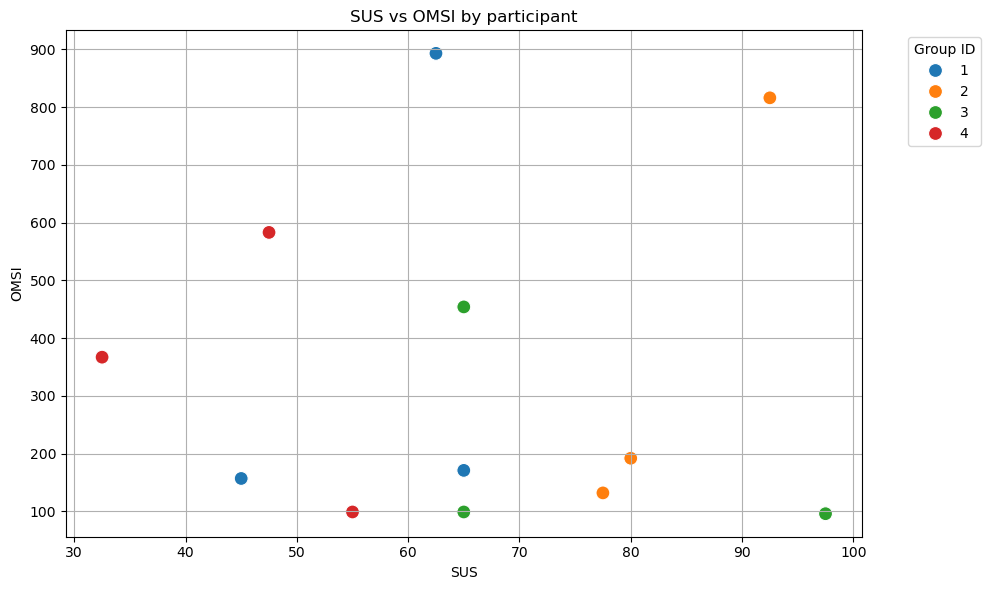

In [111]:
SUS_omsi = data_beforequestionnaire[['Subject Id', 'Group Id', 'OMSI']].merge(SUS_data, on=['Subject Id', 'Group Id'])
SUS_omsi

# Plot
plt.figure(figsize=(10, 6))

# Lines first
#sns.lineplot(data=df_long, x='Task', y='Attempts', hue='Group Id', palette='tab10', linewidth=2)

# Points on top
sns.scatterplot(data=SUS_omsi, x='SUS', y='OMSI', hue='Group Id', palette='tab10', s=100)
plt.title("SUS vs OMSI by participant")
plt.ylabel("OMSI")
plt.xlabel("SUS")
plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


**5 Point Likert Scale - Post Questionnaire**

/tmp/ipykernel_10052/451278125.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


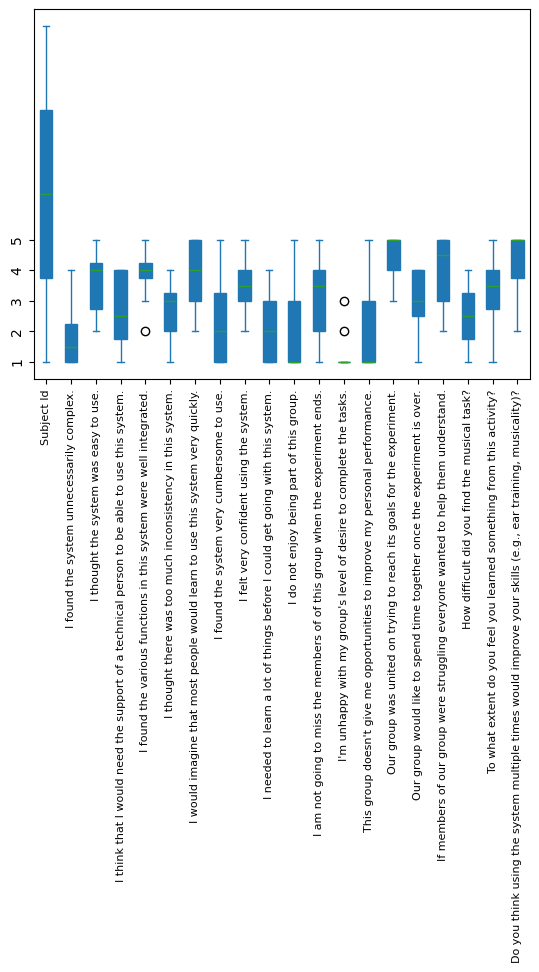

In [77]:
data_likert = data_afterquestionnaire.replace({"Strongly Disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly Agree": 5})

# drops collums that are not needed

data_likert = data_likert.drop(columns=[data_likert.columns[1]])
data_likert = data_likert.drop(columns=[data_likert.columns[1]])
data_likert = data_likert.drop(columns=[data_likert.columns[20]])


# plotting options
ax = data_likert.plot.box(patch_artist=True) 

# Create a colormap
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(data_likert.columns))]

# Assign colors to each box
for patch, color in zip(ax.artists, colors):
    patch.set_facecolor(color)
ax.set_yticks([1, 2, 3, 4, 5])
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()

### Task completement

/tmp/ipykernel_10052/2504210182.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')


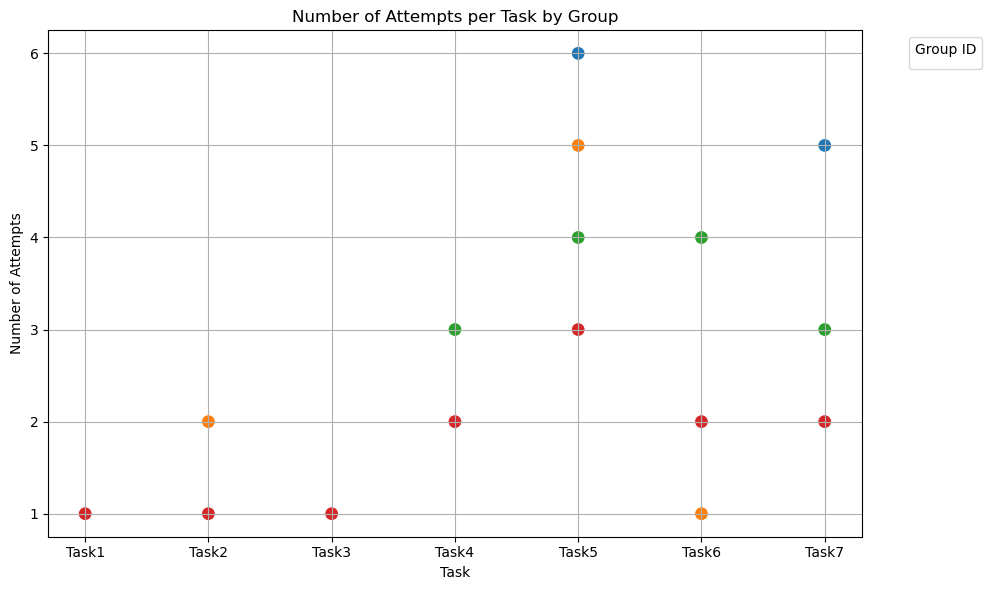

In [81]:
# Extract the task columns
task_cols = ['Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7']

# Melt the dataframe to long format
df_long = data_beforequestionnaire.melt(id_vars=['Group Id'], value_vars=task_cols,
                  var_name='Task', value_name='Attempts')

# Plot
plt.figure(figsize=(10, 6))

# Lines first
#sns.lineplot(data=df_long, x='Task', y='Attempts', hue='Group Id', palette='tab10', linewidth=2)

# Points on top
sns.scatterplot(data=df_long, x='Task', y='Attempts', hue='Group Id', palette='tab10', s=100, legend=False)
plt.title("Number of Attempts per Task by Group")
plt.ylabel("Number of Attempts")
plt.xlabel("Task")
plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


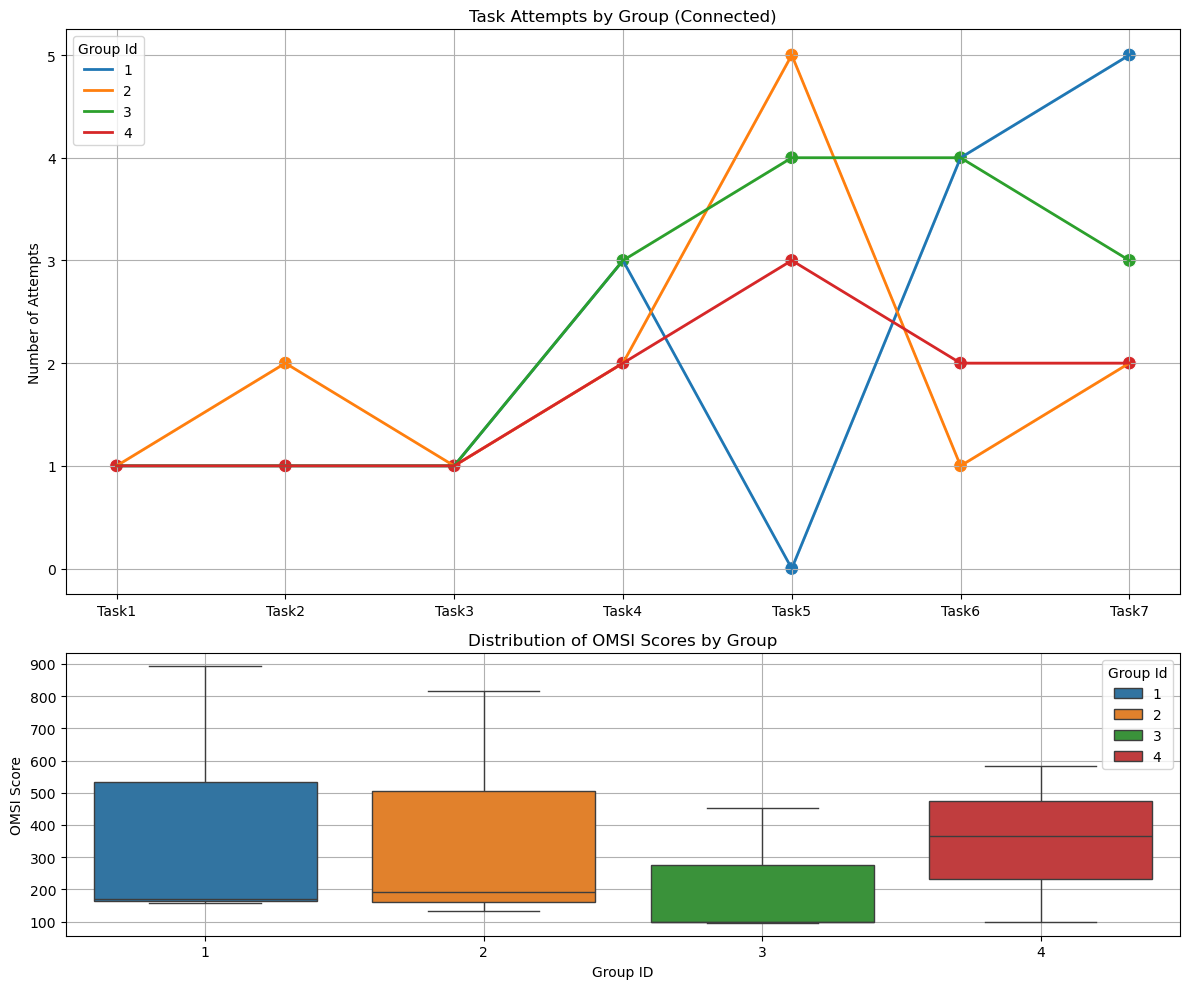

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -- SCATTER + LINE PLOT PART --

# Prepare task columns
# Extract the task columns
task_cols = ['Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7']

# Melt the dataframe to long format
df_long = data_beforequestionnaire.melt(id_vars=['Group Id'], value_vars=task_cols,
                  var_name='Task', value_name='Attempts')

# Plot
df_long['Task'] = pd.Categorical(df_long['Task'], categories=task_cols, ordered=True)

# -- PLOT BOTH TOGETHER --
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]})

# Top: Scatter + Line plot
sns.lineplot(data=df_long, x='Task', y='Attempts', hue='Group Id',
             palette='tab10', linewidth=2, ax=ax1)
sns.scatterplot(data=df_long, x='Task', y='Attempts', hue='Group Id',
                palette='tab10', s=100, ax=ax1, legend=False)

ax1.set_title("Task Attempts by Group (Connected)")
ax1.set_ylabel("Number of Attempts")
ax1.set_xlabel("")
ax1.grid(True)

# Bottom: Boxplots of OMSI scores
sns.boxplot(data=data_beforequestionnaire, x='Group Id',hue='Group Id', y='OMSI', palette='tab10', ax=ax2)
ax2.set_title("Distribution of OMSI Scores by Group")
ax2.set_xlabel("Group ID")
ax2.set_ylabel("OMSI Score")
ax2.grid(True)

plt.tight_layout()
plt.show()


**Post Questionnaire - OMS Score**

In [56]:
merged

,Subject Id,Group Id,Age,Gender,Nationality,OMSI,Task1,Task2,Task3,Task4,...,I am not going to miss the members of of this group when the experiment ends.,I'm unhappy with my group's level of desire to complete the tasks.,This group doesn't give me opportunities to improve my personal performance.,Our group was united on trying to reach its goals for the experiment.,Our group would like to spend time together once the experiment is over.,If members of our group were struggling everyone wanted to help them understand.,How difficult did you find the musical task?,To what extent do you feel you learned something from this activity?,"Do you think using the system multiple times would improve your skills (e.g., ear training, musicality)?",Any further feedback you'd like to add?
0,1,1,27,Female,China,157,1,1,1,3,...,4,3,3,4,1,4,4,3,4,NaN
1,2,1,33,Male,British,893,1,1,1,3,...,1,1,1,5,3,5,4,4,5,no
2,3,1,25,Female,Polish,171,1,1,1,3,...,2,1,4,5,3,3,4,3,5,NaN
3,4,2,30,Male,Venezuelan,816,1,2,1,2,...,2,1,1,5,3,4,1,3,5,Excellent idea. As a musician it was very intu...
4,5,2,23,Male,Danish,132,1,2,1,2,...,2,1,1,5,4,5,2,4,5,NaN
5,6,2,25,Female,Danish/Egyptian,192,1,2,1,2,...,5,1,1,5,4,5,3,5,5,"I love it!!!!!! Maybe for future, this could t..."
6,9,3,33,Female,Greek,96,1,1,1,3,...,5,1,1,5,1,5,1,5,5,NaN
7,8,3,33,Male,Northern irish,99,1,1,1,3,...,3,1,1,5,3,5,2,1,5,I would like the latency improved and a left h...
8,7,3,34,Male,Danish,454,1,1,1,3,...,4,1,3,4,3,2,2,1,3,NaN
9,10,4,24,Male,Danish,99,1,1,1,2,...,4,1,2,4,1,2,3,4,4,NaN


In [ ]:
sns.barplot(data=merged, x='OMSI', y='EarTrainingConfidence', hue='Time')
plt.title("Confidence in Ear Training: Musicians vs Non-Musicians")
plt.show()
